# Основная информация проекта

## Цель проекта
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание датасета
1. **school** - аббревиатура школы, в которой учится ученик;
2. **sex** - пол ученика ('F' - женский, 'M' - мужской);
3. **age** - возраст ученика (от 15 до 22);
4. **address** - тип адреса ученика ('U' - городской, 'R' - за городом);
5. **famsize** - размер семьи('LE3' <= 3, 'GT3' >3);
6. **Pstatus** - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно);
7. **Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
8. **Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
9. **Mjob** - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
10. **Fjob** - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);
12. **guardian** - опекун ('mother' - мать, 'father' - отец, 'other' - другое);
13. **traveltime** - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.);
14. **studytime** - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов);
15. **failures** - количество внеучебных неудач (n, если 1<=n<=3, иначе 0);
16. **schoolsup** - дополнительная образовательная поддержка (yes или no);
17. **famsup** - семейная образовательная поддержка (yes или no);
18. **paid** - дополнительные платные занятия по математике (yes или no);
19. **activities** - дополнительные внеучебные занятия (yes или no);
20. **nursery** - посещал детский сад (yes или no);
21. **higher** - хочет получить высшее образование (yes или no);
22. **internet** - наличие интернета дома (yes или no);
23. **romantic** - в романтических отношениях (yes или no);
24. **famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо);
25. **freetime** - свободное время после школы (от 1 - очень мало до 5 - очень мого);
26. **goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много);
27. **health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);
28. **absences** - количество пропущенных занятий;
29. **score** - баллы по госэкзамену по математике.


**Целевая переменная** - "score"

## Этапы выполнения проекта
 1. **[Импорт библиотек и загрузка данных](#Импорт-библиотек-и-загрузка-данных)**
 2. **[Написание функций для обработки и анализа данных](#Функции-для-обработки-и-анализа-данных)**
 3. **[Обзор данных](#Обзор-данных)** <br>
     3.1. **[Корреляционный анализ](#Корреляционный-анализ)**<br>
     3.2. **[Визуальный анализ номинативных признаков](#Визуальный-анализ-номинативных-признаков)**

# Импорт библиотек и загрузка данных

In [487]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [107]:
# Установка максимального количества строк для отображения
pd.set_option('display.max_rows', 50)
# Установка максимального количества стоолбцов для отображения
pd.set_option('display.max_columns', 50)

In [539]:
stud_eda = pd.read_csv('stud_math.csv')  # Загрузка датасета

# Функции для обработки и анализа данных

In [399]:
def parsing_all_columns_data(data):
    '''Функция для анализа всех столбцов на количество 
    уникальных значений и количество пропусков'''

    for col in data.columns:
        unique_values = len(data[col].value_counts())
        empty_values = data[col].isna().sum()
        print(
            f"В столбце '{col}' уникальных значений = {unique_values} ,а количество пропусков = {empty_values}.")
        print(
            f'Процент пропусков = {round(empty_values*100/stud_eda.shape[0],1)}%')

In [542]:
def cols_to_drop(data):
    '''Функция для определия столбцов, 
    не влияющих на целевую переменную'''

    # Поиск колонок с большим количеством пропусков, более 90%
    many_null_cols = [
        col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.9]
    # Поиск колонок в которых одно из значений встречается > 95%
    big_top_value_cols = [col for col in data.columns if data[col].value_counts(
        dropna=False, normalize=True).values[0] > 0.95]
    # Поиск колонок в которых только одно значение
    one_value_cols = [col for col in data.columns if data[col].nunique() <= 1]

    return list(set(many_null_cols + big_top_value_cols + one_value_cols))

In [396]:
def display_specification(column):
    '''Функция для посчёта уникальных значений, 
    количество пропусков в стобцак и их визуализация'''

    # Посчёт уникальных значений
    unique_values = len(stud_eda[column].value_counts())
    # Посчёт пустых значений
    empty_values = stud_eda[column].isna().sum()

    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    axes.set_ylim(0, 60)
    axes.bar(x=str(column), height=unique_values,
             width=-0.4, align='edge', label='Уникальные значения')
    # Функция для создания подписи данных уникальных значени
    drow_label(axes.patches, axes)

    axes.bar(x=str(column), height=empty_values,
             width=0.4, align='edge', label='Количество пропусков')
    # Функция для создания подписи данных количества пропусков
    drow_label(axes.patches, axes)

    axes.legend(loc=1)

In [244]:
def drow_label(rects, ax):
    '''Функция для установки меток данных диаграммы
    '''

    # Получение высоты по оси Y для расчета позиции метки
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        # Установка позиции и выравнивание меток по оси X/Y
        ax.text(rect.get_x() + rect.get_width()/2., height +
                (y_height * 0.01), '%d' % int(height), ha='center', va='bottom')

In [281]:
def definition_duplicates(data):
    '''Функция для определия дубликатов в датасете
    '''

    duplicate_data = data.duplicated().sum()
    if duplicate_data > 0:
        print('В датасете присутствуют дубликаты')
    else:
        print('В датасете дубликаты отсутствуют')

In [458]:
def display_iqr(column, boundaries):
    '''Функция построения графиков для каждого столбца с определением границ для их данных.
    Если в передоваемом словаре отсутствуют данные о границах для столбца,
    будет произведён их поиск.
    '''
    
    if stud_eda.loc[:, column].dtypes != np.dtype('O'):
        if column not in boundaries.keys():
            IQR = stud_eda[column].quantile(
                0.75) - stud_eda[column].quantile(0.25)
            perc25 = stud_eda[column].quantile(0.25)
            perc75 = stud_eda[column].quantile(0.75)
            # Определим границы
            min_value, max_value = define_boundaries(column)
            data_out = stud_eda.loc[(~stud_eda.loc[:, column].between(
                min_value, max_value)) & (pd.notnull(stud_eda.loc[:, column]))]
            # Выведем полученные данные
            print_IQR(column, IQR, perc25, perc75,
                      min_value, max_value, data_out)

            stud_eda[column].loc[stud_eda[column].between(min_value, max_value)].hist(
                bins=10, range=(min_value, max_value), label='IQR')

            plt.legend()
            plt.show()

            display_data_out(data_out, column)
        else:
            IQR = stud_eda[column].quantile(
                0.75) - stud_eda[column].quantile(0.25)
            per25 = stud_eda[column].quantile(0.25)
            per75 = stud_eda[column].quantile(0.75)
            min_value = boundaries[column][0]
            max_value = boundaries[column][1]
            data_out = stud_eda.loc[(~stud_eda.loc[:, column].between(
                min_value, max_value)) & (pd.notnull(stud_eda.loc[:, column]))]
            # Выведем полученные данные
            print_IQR(column, IQR, per25, per75,
                      min_value, max_value, data_out)

            stud_eda[column].loc[stud_eda[column].between(min_value, max_value)].hist(
                bins=10, range=(min_value, max_value), label='IQR')

            plt.legend()
            plt.show()

            display_data_out(data_out, column)

In [412]:
def display_data_out(data, column):
    '''Функция для отображения найденных выбросов
    '''

    if 0 < len(data) >= 5:
        print(f'Отображение первых 5 строк с ошибками в столбце {column}')
        display(data.head(5))
    elif len(data) == 1:
        print(f'Отображение строки с ошибкой в столбце {column}')
        display(data)

In [410]:
def remove_outlier(column):
    '''Функция удаления выбросов 
    для определённой колонки(column) датасета
    '''

    # Определение границ
    min_value, max_value = define_boundaries(column)
    stud_eda = stud_eda.loc[stud_eda[column].between(min_value, max_value)]

In [411]:
def define_boundaries(column):
    '''Функция определия границ выбросов 
    для определённой колонки(column) датасета
    '''

    IQR = stud_eda[column].quantile(
        0.75) - stud_eda[column].quantile(0.25)
    perc25 = stud_eda[column].quantile(0.25)
    perc75 = stud_eda[column].quantile(0.75)
    min_value = perc25 - 1.5*IQR
    max_value = perc75 + 1.5*IQR

    return min_value, max_value

In [424]:
def print_IQR(column, IQR, perc25, perc75, min_value, max_value, data_out):
    '''Функция вывода данных'''

    print(f'Распределение IQR для столбца - {column}')
    print(f'Количество ошибок - {data_out.shape[0]}')
    print('25-й перцентиль: {},'.format(perc25),
          '75-й перцентиль: {},'.format(perc75),
          'IQR: {}, '.format(IQR),
          'Границы выбросов: [{}, {}].'.format(min_value, max_value))

In [545]:
def get_boxplot(column, boundaries):
    '''Функция построения boxplot для каждого столбца с определением границ для их данных.
    Если в передоваемом словаре отсутствуют данные о границах для столбца,
    будет произведён их поиск.
    '''

    plt.figure(figsize=(12, 5))
    boxplot = sns.boxplot(x=stud_eda[column])
    if column in boundaries.keys():
        boxplot.axes.set_title('Границы выбросов: [{}, {}].'.format(boundaries[column][0],
                                                                    boundaries[column][1]), fontsize=16)
    else:
        # Определение границ
        min_value, max_value = define_boundaries(column)
        boxplot.axes.set_title('Границы выбросов: [{}, {}].'.format(
            min_value, max_value), fontsize=16)
    plt.show()

In [584]:
def get_score_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
               data=stud_eda.loc[stud_eda.loc[:,column].isin(stud_eda.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [595]:
def get_stat(column):
    '''
    Функция для определения признаков со статистически значимыми отклонениями.    
    '''

    cols = stud_eda.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_eda.loc[stud_eda.loc[:, column] == comb[0], 'score'],
                     stud_eda.loc[stud_eda.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):                                    # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            important_for_model.append(column)
            break

# Обзор данных

In [537]:
# Проверка на успешность загрузки данных и краткий вывод таблицы с информацией
display(stud_eda.head(10))
stud_eda.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# Вывод количества строк и столбцов таблицы
print(f'Датасет состоит из {stud_eda.shape[0]} строк и {stud_eda.shape[1]} столбцов')

Датасет состоит из 395 строк и 30 столбцов


In [435]:
# Подсчёт уникальных значений и количество пропусков в столбцак датасета
parsing_all_columns_data(stud_eda)

В столбце 'school' уникальных значений = 2 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'sex' уникальных значений = 2 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'age' уникальных значений = 8 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'address' уникальных значений = 2 ,а количество пропусков = 15.
Процент пропусков = 3.9%
В столбце 'famsize' уникальных значений = 2 ,а количество пропусков = 27.
Процент пропусков = 6.9%
В столбце 'Pstatus' уникальных значений = 2 ,а количество пропусков = 45.
Процент пропусков = 11.6%
В столбце 'Medu' уникальных значений = 5 ,а количество пропусков = 3.
Процент пропусков = 0.8%
В столбце 'Fedu' уникальных значений = 6 ,а количество пропусков = 24.
Процент пропусков = 6.2%
В столбце 'Mjob' уникальных значений = 5 ,а количество пропусков = 19.
Процент пропусков = 4.9%
В столбце 'Fjob' уникальных значений = 5 ,а количество пропусков = 36.
Процент пропусков = 9.3%
В столбце 'reason' уникальных знач

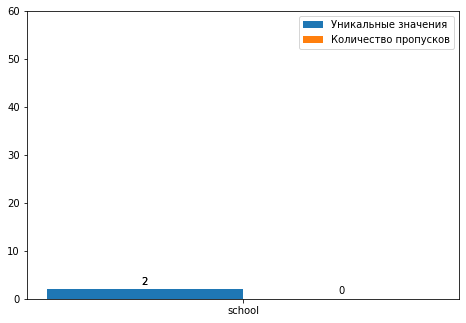

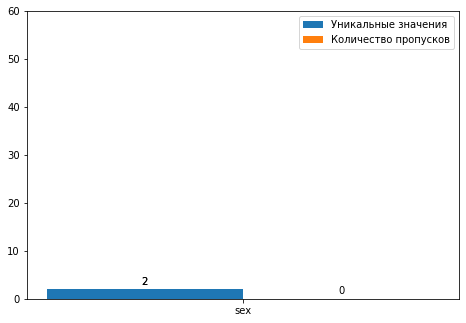

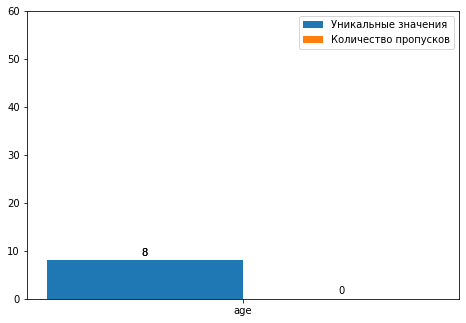

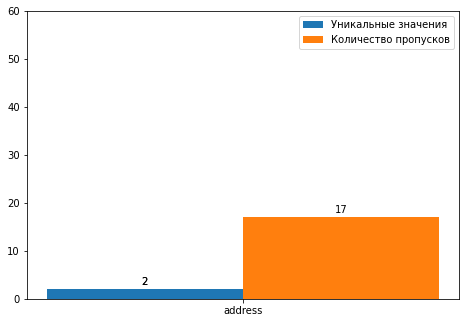

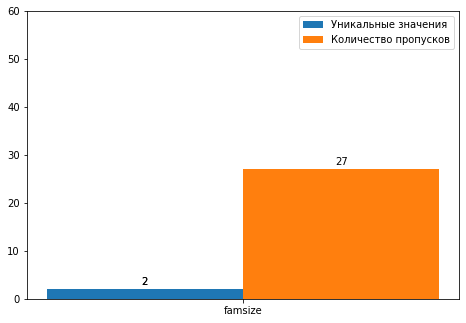

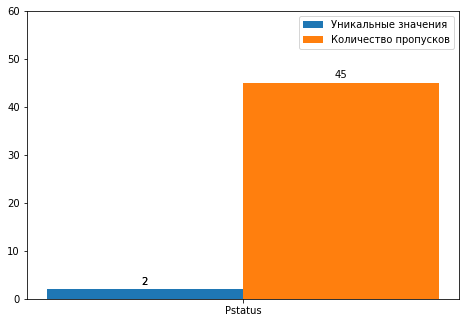

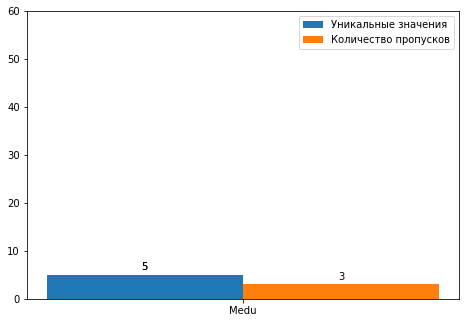

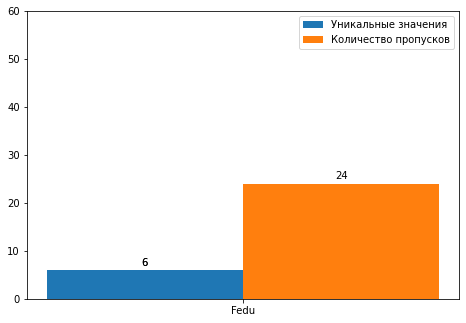

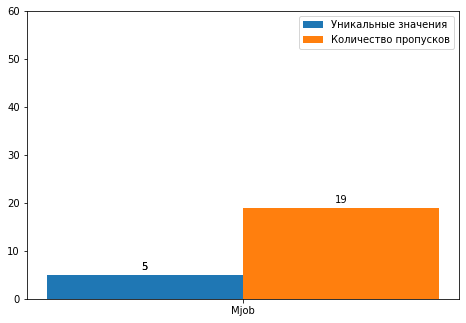

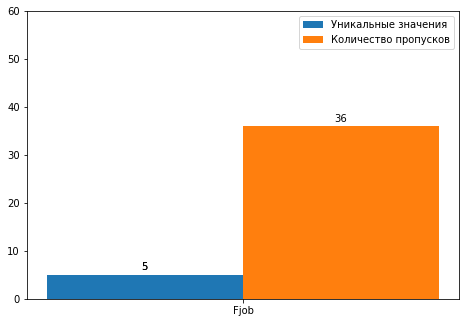

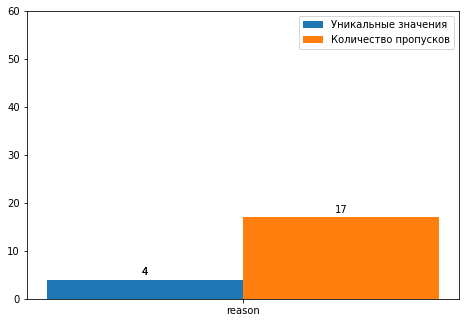

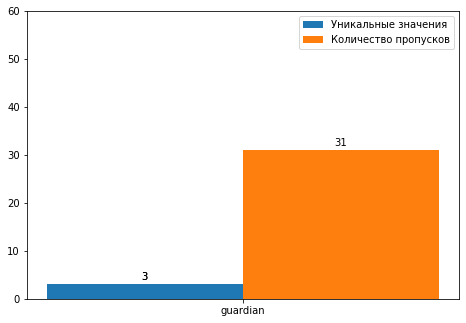

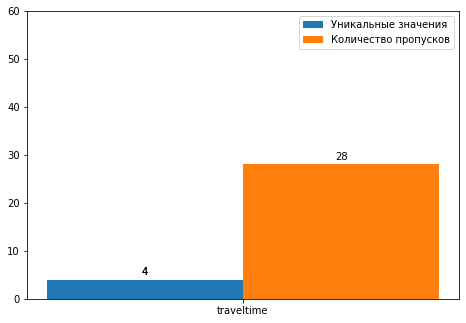

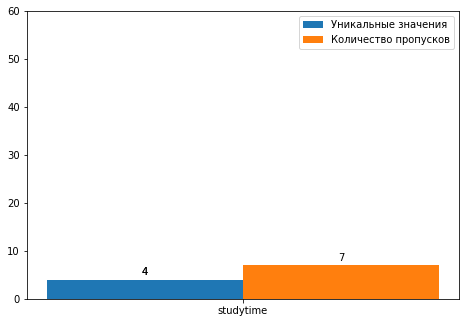

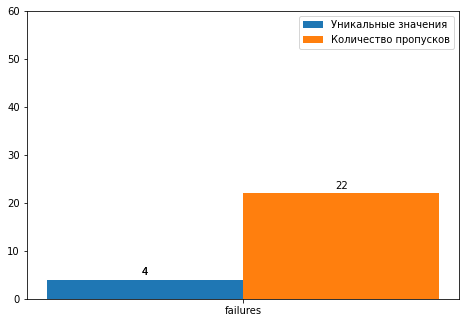

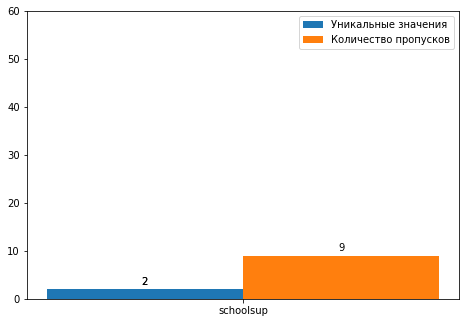

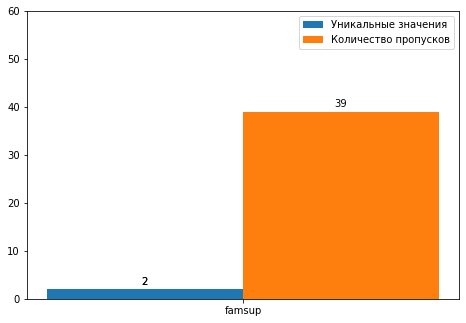

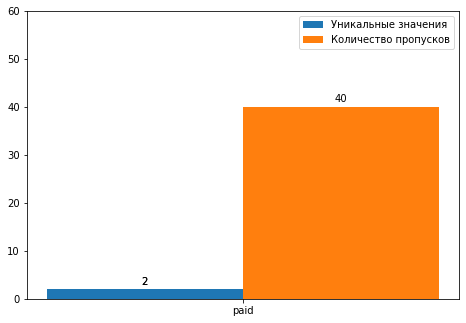

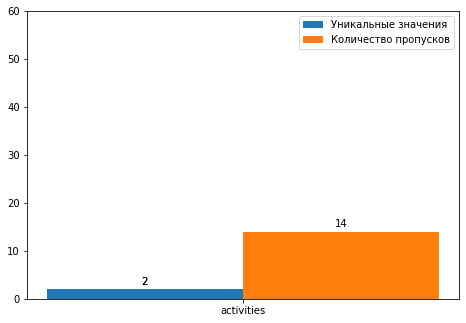

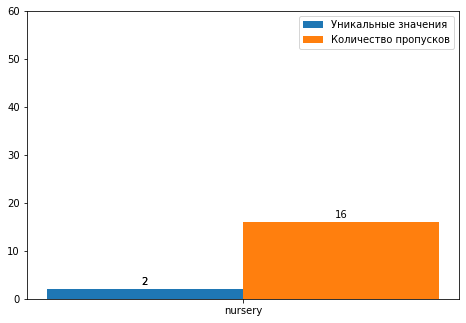

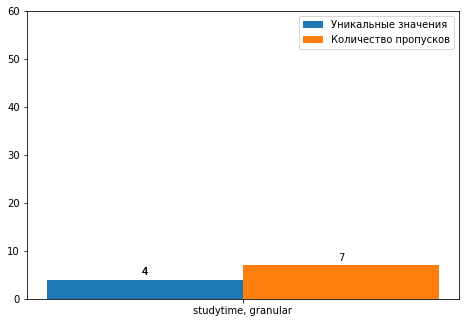

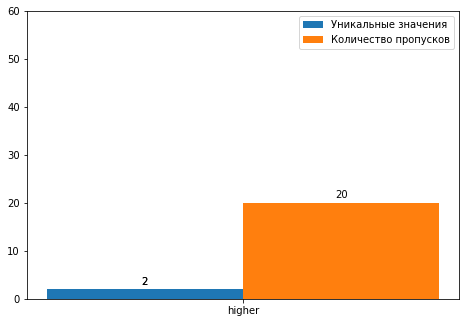

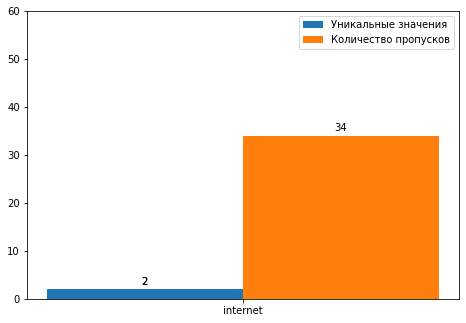

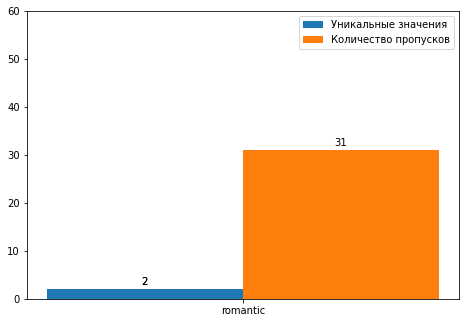

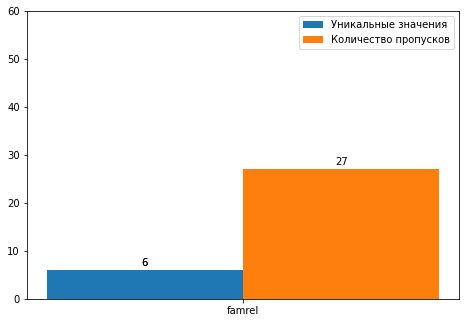

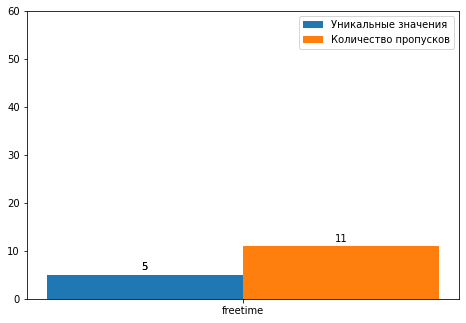

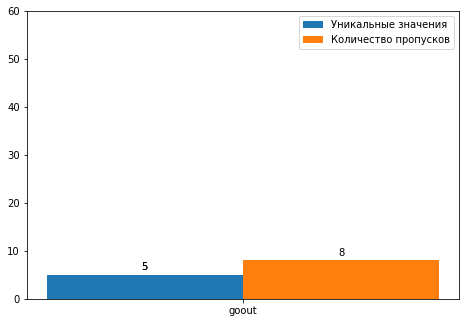

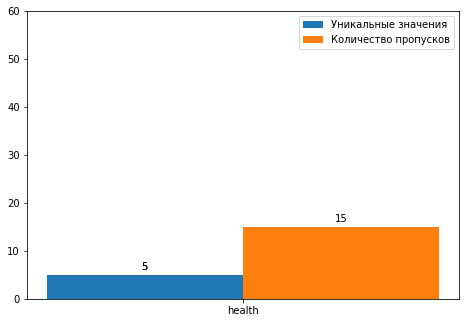

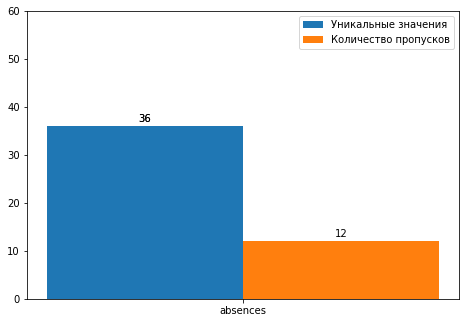

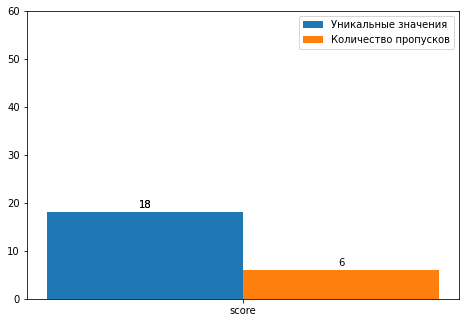

In [417]:
for column in stud_eda.columns:
    display_specification(column)

In [248]:
# Подсчёт количества столбцов с пропущенными значениями
print(
    f'Количество столбцов с пропущенными значениями - {stud_eda.isnull().any().sum()}')

Количество столбцов с пропущенными значениями - 26


In [496]:
# Проверка датасета на наличие дубликатов
definition_duplicates(stud_eda)

В датасете дубликаты отсутствуют


In [454]:
data_boundaries = {'age': [15, 22],
                   'Medu': [0, 4],
                   'Fedu': [0, 4],
                   'traveltime': [1, 4],
                   'studytime': [1, 4],
                   'famrel': [1, 5],
                   'freetime': [1, 5],
                   'goout': [1, 5],
                   'health': [1, 5],
                   'failures': [0, 3],
                   'score': [0, 100]}

Распределение IQR для столбца - age
Количество ошибок - 0
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [15, 22].


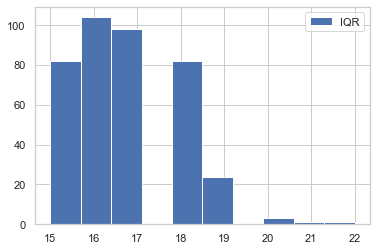

Распределение IQR для столбца - Medu
Количество ошибок - 0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [0, 4].


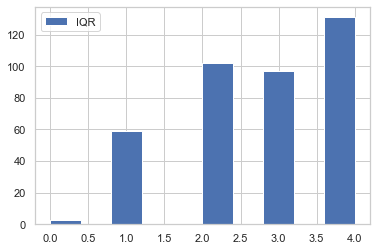

Распределение IQR для столбца - Fedu
Количество ошибок - 1
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0, 4].


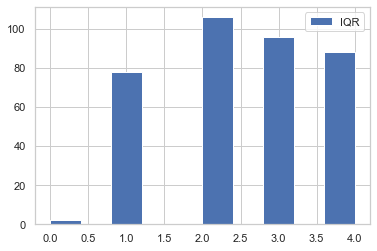

Отображение строки с ошибкой в столбце Fedu


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Распределение IQR для столбца - traveltime
Количество ошибок - 0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].


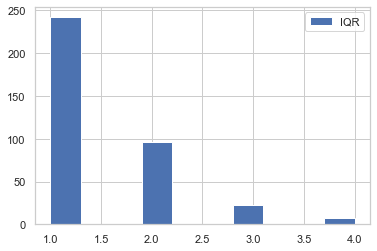

Распределение IQR для столбца - studytime
Количество ошибок - 0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].


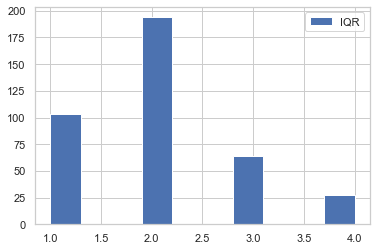

Распределение IQR для столбца - failures
Количество ошибок - 0
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0, 3].


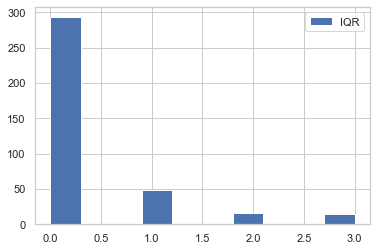

Распределение IQR для столбца - studytime, granular
Количество ошибок - 27
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


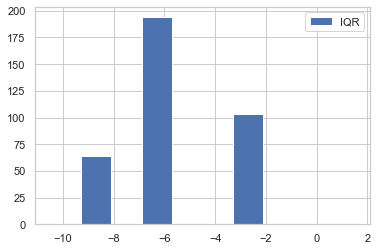

Отображение первых 5 строк с ошибками в столбце studytime, granular


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,reputation,father,2.0,4.0,0.0,no,yes,no,no,no,-12.0,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,no,4.0,3.0,2.0,5.0,0.0,75.0


Распределение IQR для столбца - famrel
Количество ошибок - 1
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [1, 5].


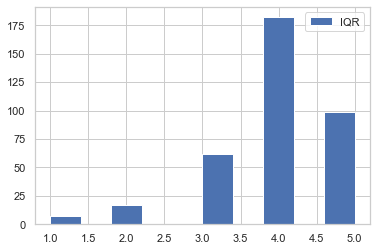

Отображение строки с ошибкой в столбце famrel


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Распределение IQR для столбца - freetime
Количество ошибок - 0
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1, 5].


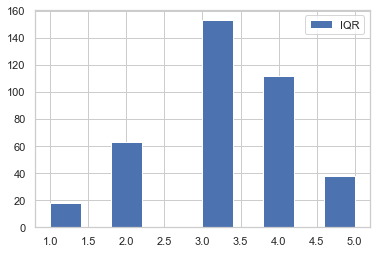

Распределение IQR для столбца - goout
Количество ошибок - 0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [1, 5].


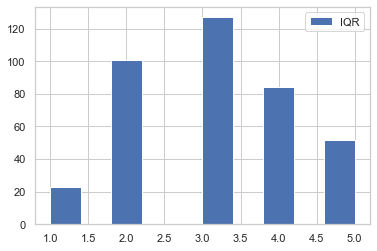

Распределение IQR для столбца - health
Количество ошибок - 0
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [1, 5].


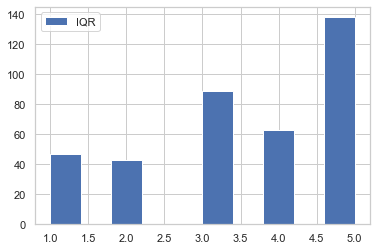

Распределение IQR для столбца - absences
Количество ошибок - 17
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


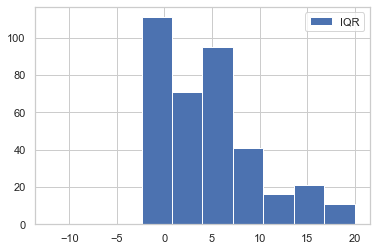

Отображение первых 5 строк с ошибками в столбце absences


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0


Распределение IQR для столбца - score
Количество ошибок - 0
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [0, 100].


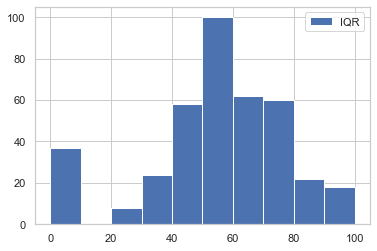

In [459]:
for column in stud_eda.columns:
    display_iqr(column,data_boundaries)

In [541]:
# Вывод столбцов, не влияющих на целевую переменную
print(cols_to_drop(stud_eda))

[]


### Промежуточный результат обзора данных
Представленный датасет состоит из 30 столбцов, 17 из которых имеют строковый тип, а 13 числовой, и содержит 395 строк с информацией. В столбцах датасета, кроме (school, sex, age) имеются пропуски в значениях.

В ходе обзора данных в столбце целевой переменной 'score' было выявлено 6 строк с пустыми значениями. Так как целевая переменная не может содержать пустые, приблизительные и вероятностные значения, необходимо удалить выявленные строки.

В датасете не присутствуют столбцы, не влияющие на целевую переменную.

В нескольких стоблцах датасета найдены выбросы. Их необходимо удалить или заменить на новые значения (медиану).

В датасете найденны столбы, включающие в себя ошибки в данных(выбросы, отсутсвие) - "Fedu, absences, famrel,studytime, granular".   


In [586]:
# Удаление строк с пустым значением в столбце 'score'
stud_eda = stud_eda.dropna(subset=['score'])

**Проведём анализ столбцов с ошибками**

In [473]:
# Список столбцов с ошибками
err_column = ['Fedu', 'absences', 'famrel', 'studytime, granular']

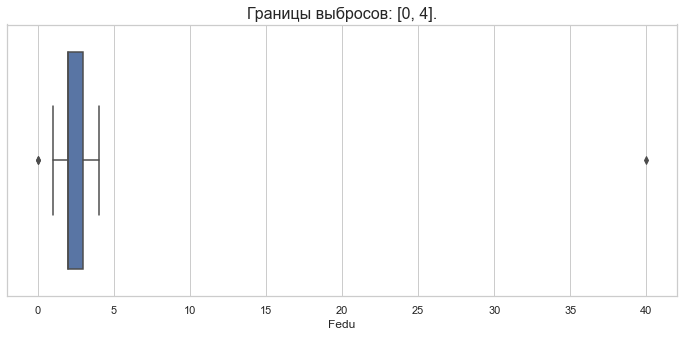

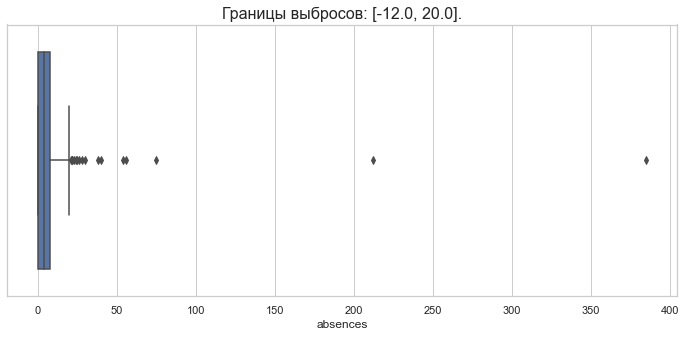

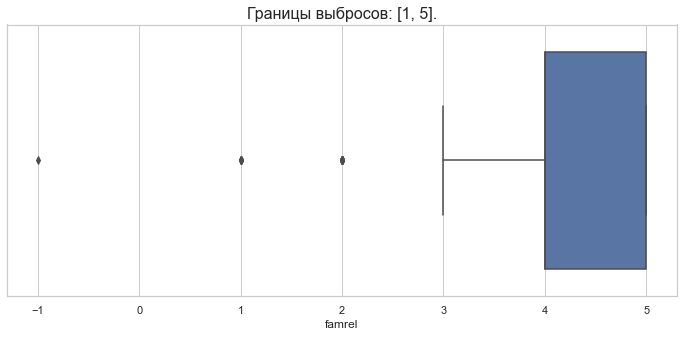

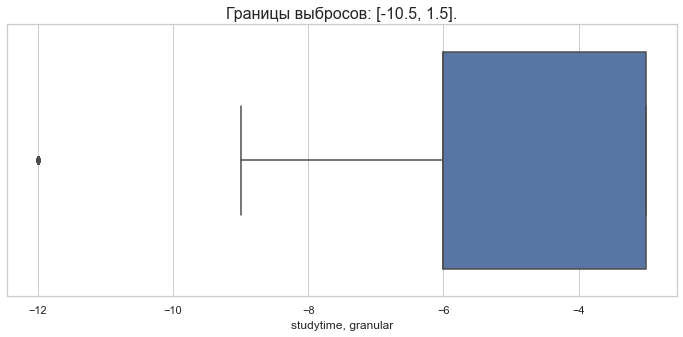

In [489]:
# Вывод графиков boxplot для столбцов с ошибками
for column in err_column:
    get_boxplot(column, data_boundaries)

Для столбца "Fedu" определён выброс = 40. Можно предположить, что данное значение могло быть введено некорректно, так как максимальная граница в диапазоне = 4 и данное значение можно заменить (40 → 4).
<br>
Для столбца "absences", судя из графика, есть два выброса которые невозможно объяснить. Можно удалить строки с выявленными значениями или заменить их.
<br>
Для столбца "famrel" определён выброс = -1. Можно предположить, что данное значение могло быть введено некорректно, так как минимальная граница в диапазоне = 1 и данное значение можно заменить (-1 → 1).
<br>
Для столбца "studytime, granular" нет описания и дальнейшее размышления о выбросах можно прекратить.

In [588]:
# Замена значений согласно результатом проведенного анализа столбцов с ошибками
stud_eda.Fedu = stud_eda.Fedu.replace(40, 4)
stud_eda.absences = stud_eda.absences.apply(
    lambda x: stud_eda.absences.median() if x > 100 else x)
stud_eda.famrel = stud_eda.famrel.replace(-1, 1)

**Проведём анализ столбца "studytime, granular"**

Для столбца **"studytime, granular"** в датасете нет описания, но в нем есть столбец со схожим наименованием - **"studytime"**. Попробуем проанализировать эти столбцы для поисков взяимосвязей.

In [526]:
# Запись данных корреляции в переменную correlation
correlation = stud_eda_corr[['studytime, granular', 'studytime']].corr()

Для удобства отобразим полученные значения на тепловой карте

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


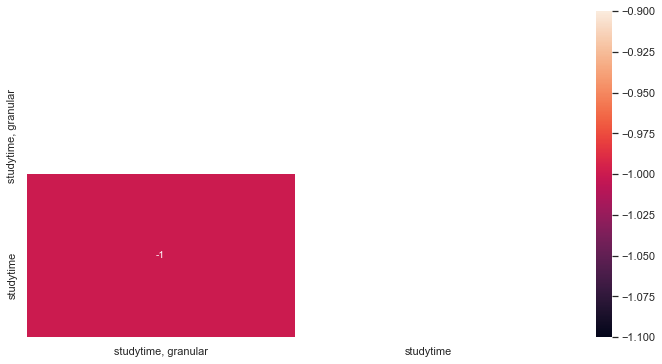

In [582]:
display(correlation)
plt.figure(figsize=(12, 6))

mask = np.triu(correlation)
sns.heatmap(correlation, mask=mask, annot=True)
plt.show()

Исходя из построенного графику можно увидеть, что **"studytime, granular"** имеент полную обратную корреляцию с **"studytime"**. Так как **"studytime, granular"** не имеет описания в датасете и имеент полную обратную корреляцию с **"studytime"**, его мужно удалить.

In [589]:
# Удаление столбца, исходя из проведённого анализа данной переменной
stud_eda = stud_eda.drop('studytime, granular', axis=1)

### Корреляционный анализ

Для предстоящей предобработке данных необходимо провести корреляционный анализ переменных для поиска переменных, которые необходимо исключить или оставить для дальнейшей работы.

In [574]:
# создадим список числовых столбцов
col = stud_eda.select_dtypes(include='number').columns

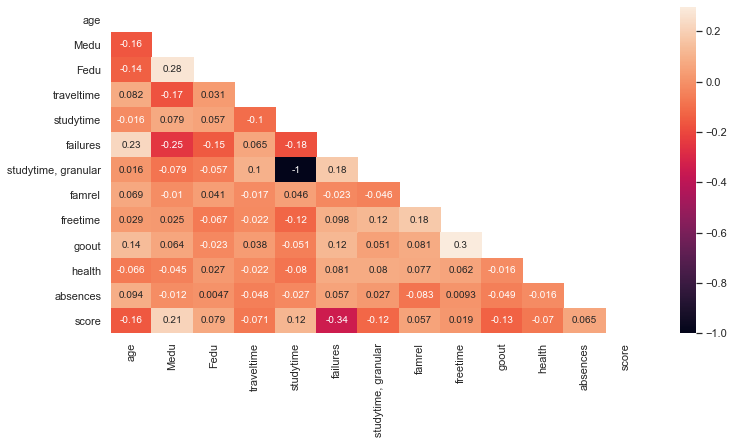

In [575]:
plt.figure(figsize=(12, 6))
correlation_stud = stud_eda[col].corr()
mask = np.triu(correlation_stud)
sns.heatmap(correlation_stud, mask=mask, annot=True)
plt.show()

In [564]:
stud_eda[col].corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


**Создадим таблицу с корреляциями для удобства**

In [569]:
corr_data = pd.DataFrame(stud_eda.corr()['score'].values, index=stud_eda.corr()[
                         'score'].index, columns=['correlation'])
corr_data = corr_data.drop('score')
corr_data.sort_values(by='correlation',ascending=False)

,correlation
Medu,0.213349
studytime,0.115741
Fedu,0.078573
absences,0.065283
famrel,0.057112
freetime,0.019026
health,-0.070460
traveltime,-0.070559
"studytime, granular",-0.115741
goout,-0.129685


### Визуальный анализ номинативных признаков

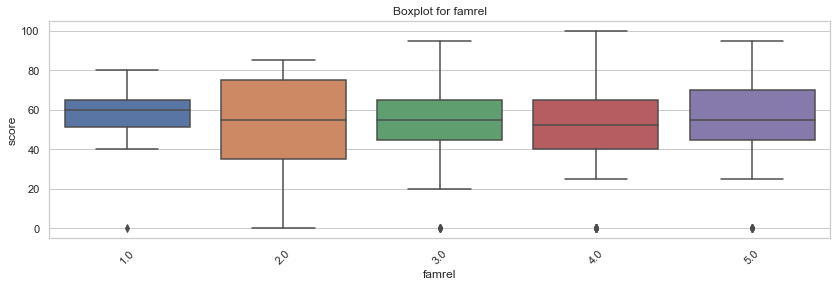

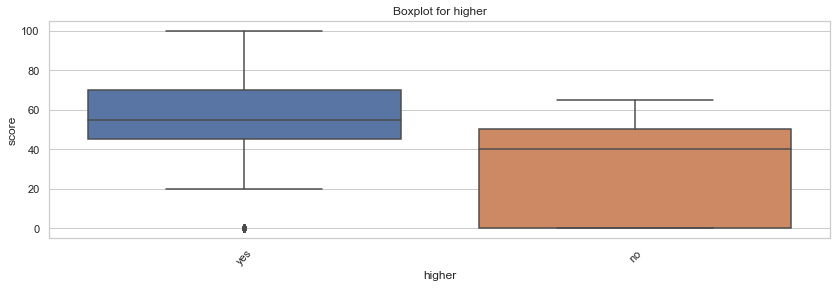

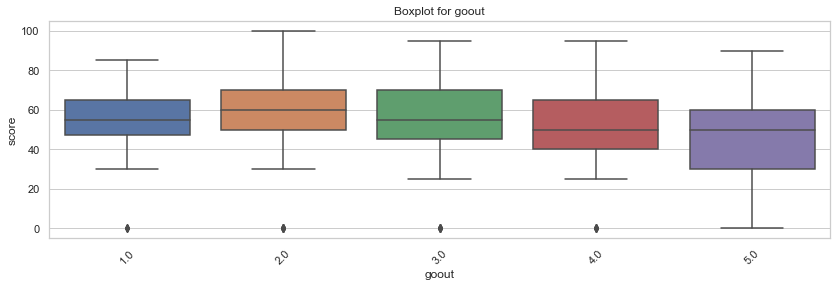

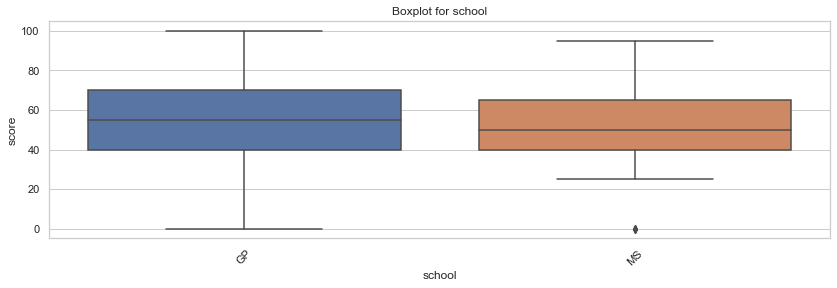

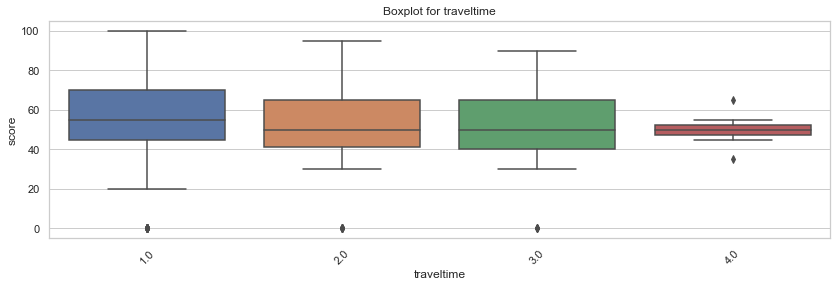

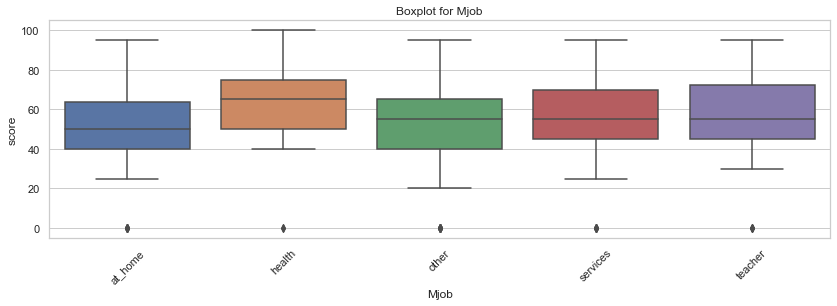

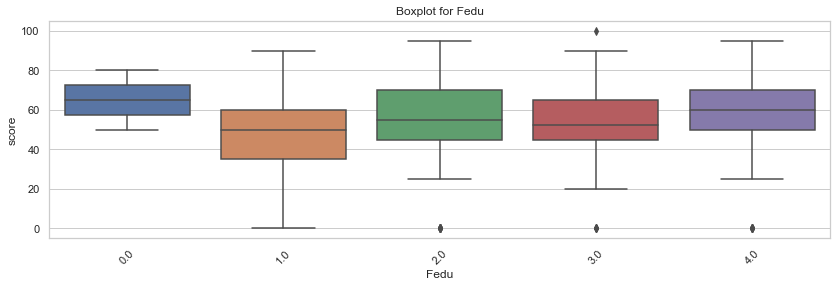

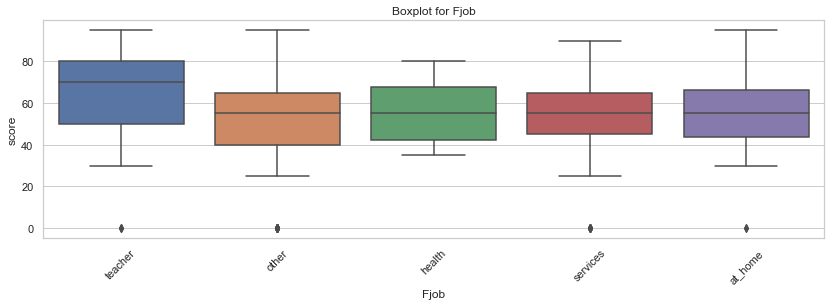

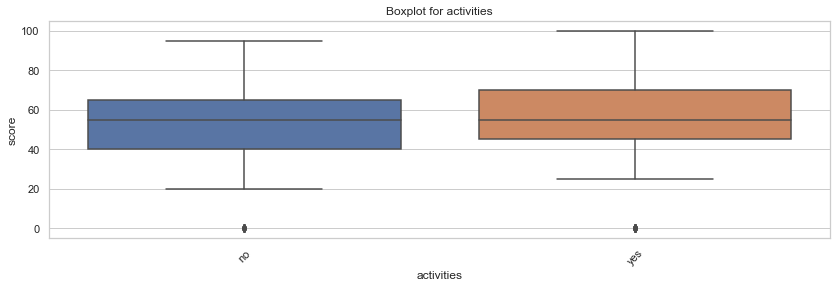

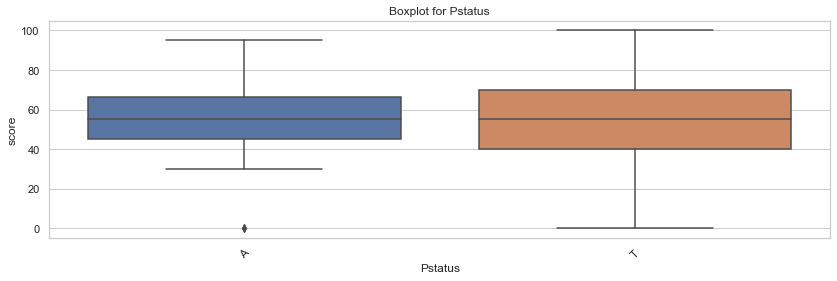

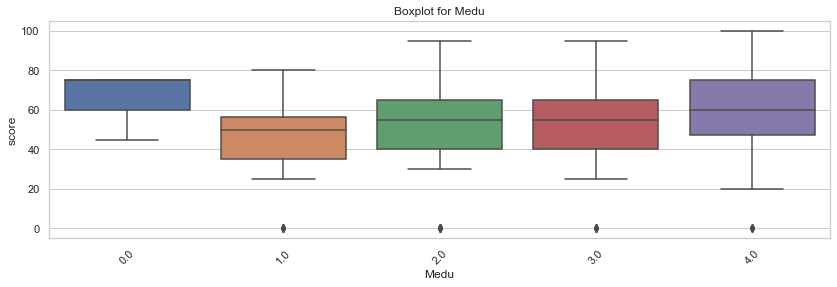

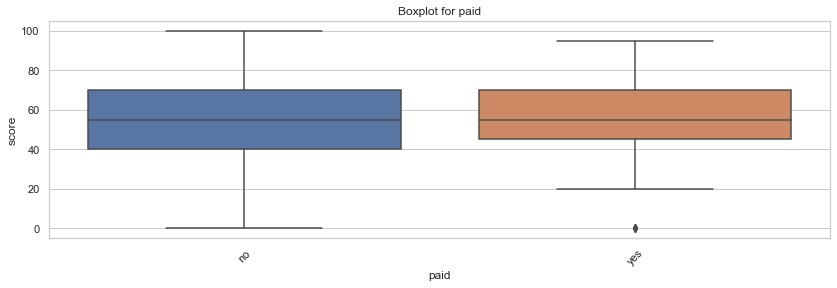

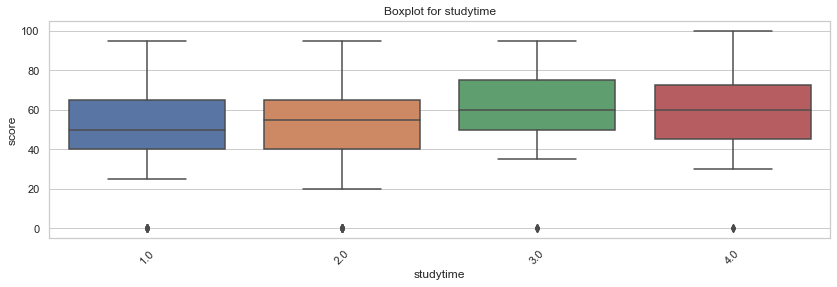

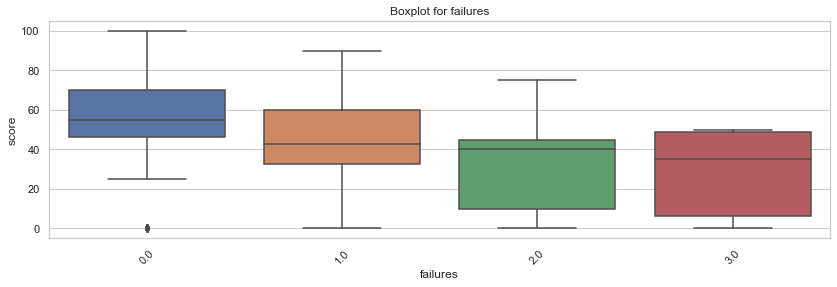

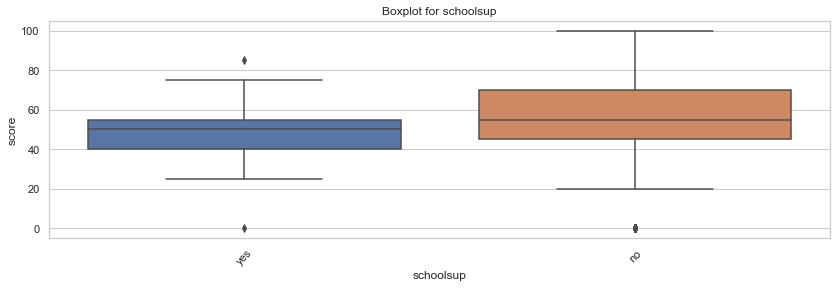

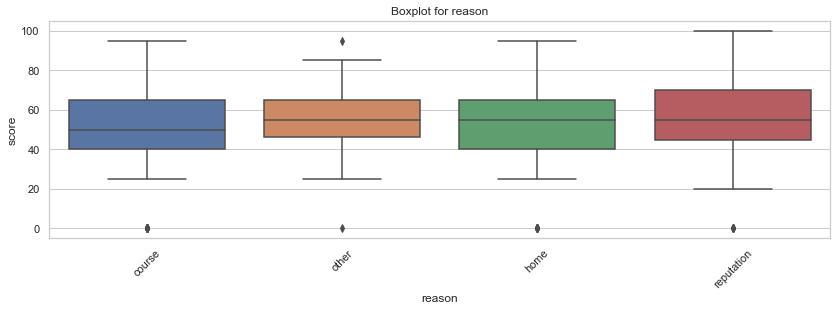

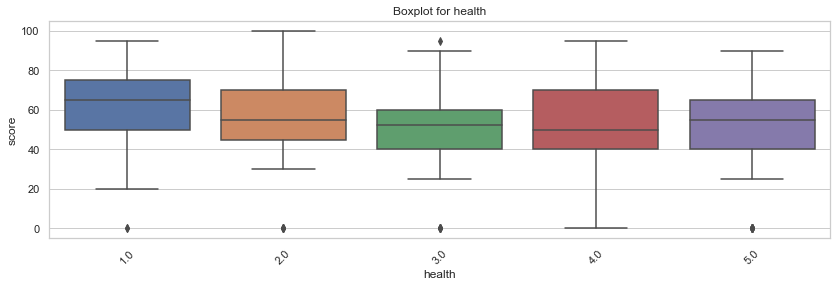

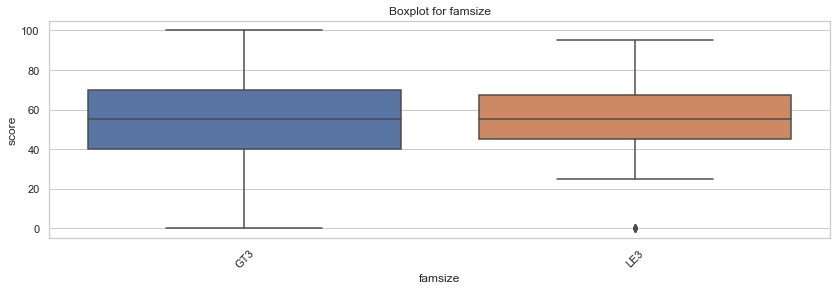

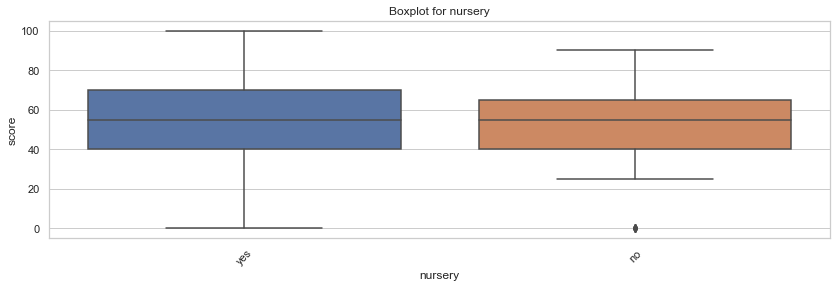

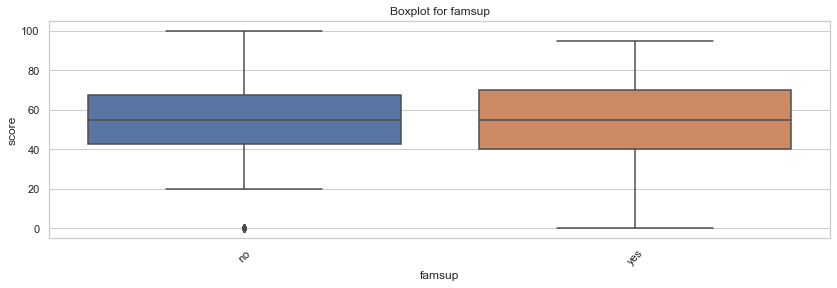

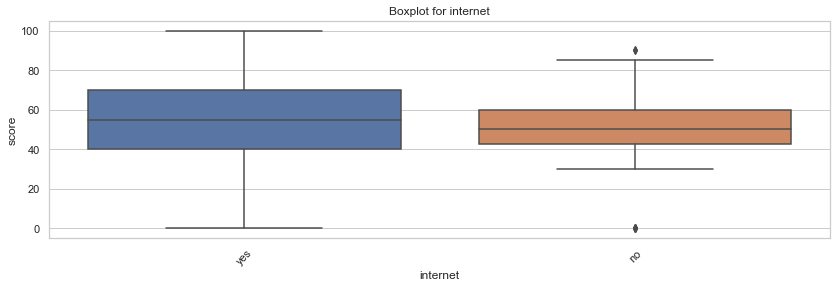

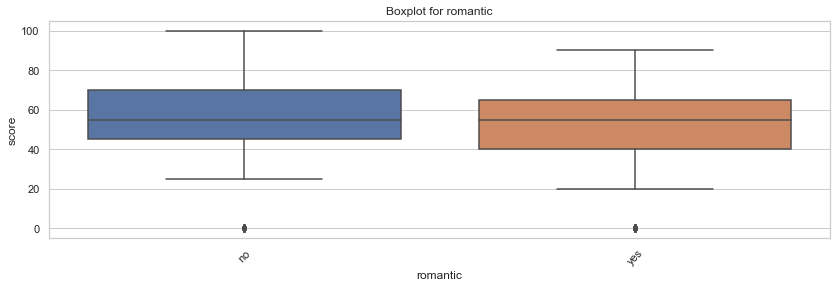

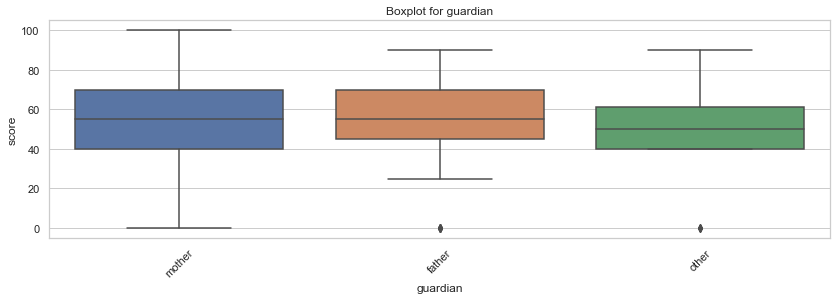

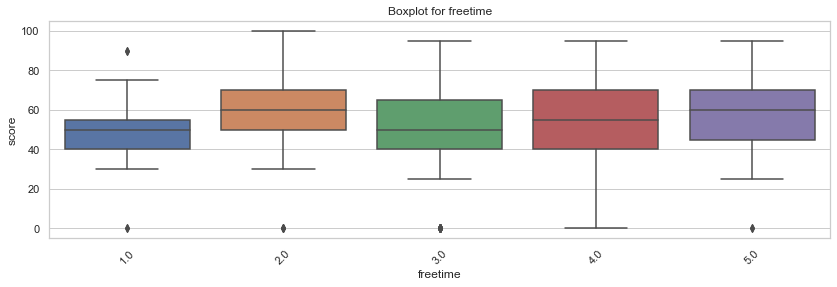

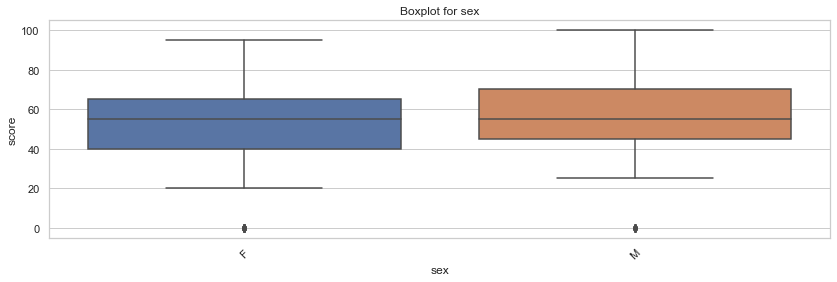

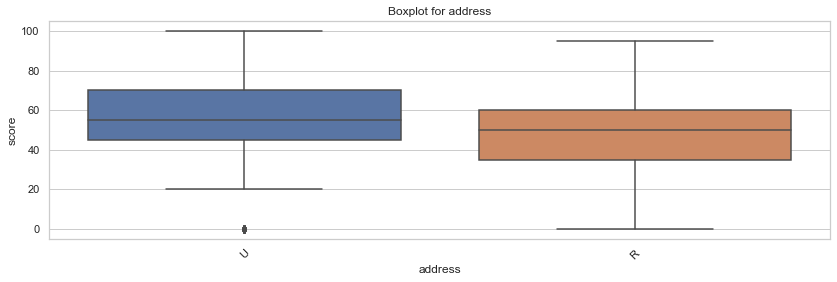

In [592]:
cols = list(set(stud_eda.columns)-set(['age','absences','score']))
for column in cols:
    get_score_boxplot(column)

In [597]:
# создание списка важных факторных признаков для будущей модели
important_for_model = []

for col in cols:
    get_stat(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
